<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Tensors

Tensors are multi-dimensional arrays with a uniform type

##Question 1


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [2]:
import tensorflow as tf

In [3]:
tensor_0 = tf.constant(99.99)

In [4]:
print(tensor_0)

tf.Tensor(99.99, shape=(), dtype=float32)


In [5]:
print(type(tensor_0))

<class 'tensorflow.python.framework.ops.EagerTensor'>


### Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [6]:
rank_1 = tf.constant([9,8,7,6,5])

### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [7]:
plus_7 = rank_1 + 7
plus_7

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([16, 15, 14, 13, 12], dtype=int32)>

### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [8]:
tensor_2 = tf.constant([[1, 2, 3], [ 4,5,6]])
print(tensor_2)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


### Change the shape of the above created tensor to shape (3,2)

In [9]:
tf.reshape(tensor_2, [3,2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

### Check the dtype, number of axes and the shape of tensor

In [10]:
tensor_2.dtype

tf.int32

In [11]:
tensor_2.ndim

2

In [12]:
tensor_2.shape

TensorShape([2, 3])

- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [13]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, r2_score

# import libraries from tensorflow
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input, BatchNormalization, LeakyReLU, ReLU
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import HeUniform


## Question 1

### Load the data
- Load the data, check the shape of data

In [14]:
df = pd.read_csv('/content/drive/MyDrive/greatlearning/NNDL lab/car_data-1.csv')

In [15]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [16]:
df.shape

(8128, 11)

In [17]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 698.6+ KB


In [19]:
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

In [20]:
def process_obj_data(data):
  try:
    if type(data) == str:
      return float(data.split()[0])
    else:
      return data
  except:
    return np.nan

In [21]:
df.mileage = df.mileage.map(process_obj_data)
df.engine = df.engine.map(process_obj_data)
df.max_power = df.max_power.map(process_obj_data)

In [22]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [23]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [24]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [25]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [26]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [27]:
# label encoding owner
owner_mapping = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}
df['owner'] = df['owner'].map(owner_mapping)

In [28]:
ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int64)
cat_col = ['fuel','seller_type','transmission']
z = ohe.fit_transform(df[cat_col])
encoded_data = pd.DataFrame(z,columns=ohe.get_feature_names(cat_col))
encoded_data.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,1,0,0,1,0,1
1,1,0,0,1,0,1
2,0,0,1,1,0,1
3,1,0,0,1,0,1
4,0,0,1,1,0,1


In [29]:
df1 = df.drop(columns=cat_col, axis=1)
final_df = pd.concat([df1,encoded_data], axis=1)
final_df.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2014,450000,145500,1,23.40,1248.0,74.00,5.0,1,0,0,1,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,1,0,0,1,0,1
2,2006,158000,140000,3,17.70,1497.0,78.00,5.0,0,0,1,1,0,1
3,2010,225000,127000,1,23.00,1396.0,90.00,5.0,1,0,0,1,0,1
4,2007,130000,120000,1,16.10,1298.0,88.20,5.0,0,0,1,1,0,1


In [30]:
final_df.shape

(8128, 14)

In [31]:
final_df.isnull().sum()

year                              0
selling_price                     0
km_driven                         0
owner                             0
mileage                         221
engine                          221
max_power                       216
seats                           221
fuel_Diesel                       0
fuel_LPG                          0
fuel_Petrol                       0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission_Manual               0
dtype: int64

In [32]:
final_df = final_df.dropna(axis=0)

In [33]:
final_df.shape

(7906, 14)

## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [34]:
X = final_df.drop(['selling_price'], axis=1)
y = final_df.selling_price

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [36]:
y_test.shape

(1977,)

In [37]:
X_train.shape

(5929, 13)

In [38]:
X_test.shape

(1977, 13)

In [39]:
scaler = StandardScaler()

In [40]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [41]:
X_train.shape

(5929, 13)

In [42]:
model = Sequential()

# input layer has 13 features
model.add(tf.keras.Input(shape=(13)))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1 ,activation='linear'))


### Check model summary and visualize the model

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

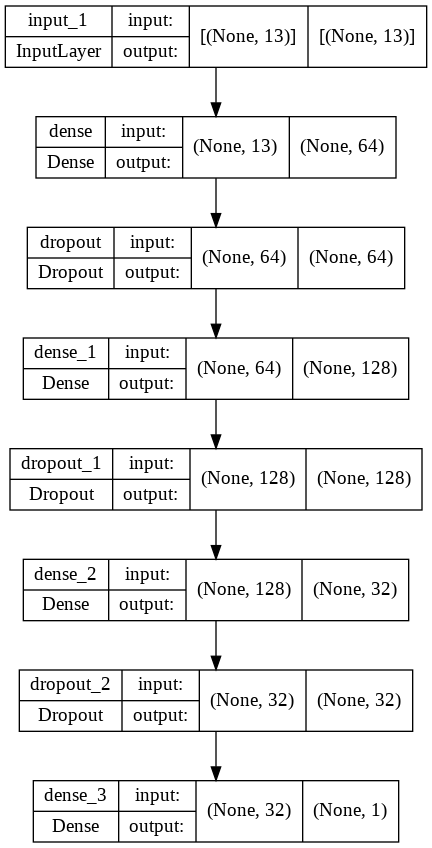

In [44]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [45]:
def r_2_score(y_true, y_pred):
    SS_resid =  K.sum(K.square( y_true-y_pred )) 
    SS_total = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_resid/(SS_total + 0.0000001 ))  # 0.0000001 to avoid division by 0

In [46]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[r_2_score])

Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 1000
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [47]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

history = model.fit(X_train_sc, y_train, batch_size=32, epochs=1000, verbose=1, validation_data=(X_test_sc, y_test), callbacks=callback)

Epoch 1/1000
186/186 [==============================] - 2s 8ms/step - loss: 647184.0625 - r_2_score: -1.1695 - val_loss: 647979.1875 - val_r_2_score: -1.0132
Epoch 2/1000
186/186 [==============================] - 1s 6ms/step - loss: 601280.0000 - r_2_score: -1.0288 - val_loss: 529978.8125 - val_r_2_score: -0.6128
Epoch 3/1000
186/186 [==============================] - 1s 6ms/step - loss: 418916.3125 - r_2_score: -0.2800 - val_loss: 330499.6875 - val_r_2_score: 0.1595
Epoch 4/1000
186/186 [==============================] - 1s 5ms/step - loss: 287729.3125 - r_2_score: 0.3180 - val_loss: 259395.1250 - val_r_2_score: 0.4763
Epoch 5/1000
186/186 [==============================] - 1s 5ms/step - loss: 243424.6094 - r_2_score: 0.5382 - val_loss: 228495.1406 - val_r_2_score: 0.6090
Epoch 6/1000
186/186 [==============================] - 1s 7ms/step - loss: 224570.0312 - r_2_score: 0.5993 - val_loss: 211676.5781 - val_r_2_score: 0.6579
Epoch 7/1000
186/186 [==============================] - 2s 

## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

In [48]:
model.evaluate(X_test_sc, y_test, batch_size=64)

31/31 [==============================] - 0s 3ms/step - loss: 114469.1484 - r_2_score: 0.9236


[114469.1484375, 0.9236108064651489]

- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

In [49]:
y_pred = model.predict(X_test_sc)
print(r2_score(y_test,y_pred))

0.9342096419237221


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

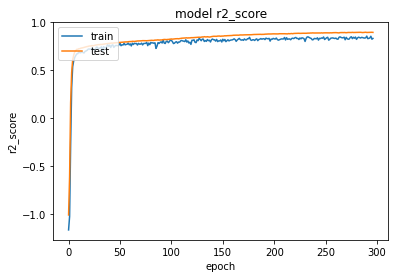

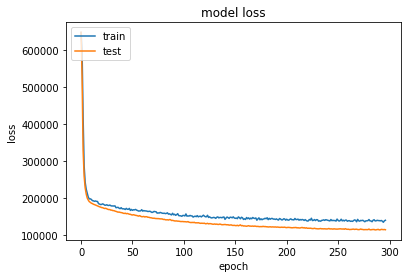

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['r_2_score'])
plt.plot(history.history['val_r_2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Question 7

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Add 3 hidden layer with activation leaky-relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [70]:
#initialise model
model_2 = Sequential()
#input layer
model_2.add(tf.keras.Input(shape=(13)))

#add new layer
model_2.add(Dense(64,activation="leaky_relu"))
# Dropout for regularization to prevent overefitting
#model_2.add(Dropout(0.15))

#normaliztion layer
model_2.add(BatchNormalization())

model_2.add(Dense(128, activation="leaky_relu"))
#model_2.add(Dropout(0.10))

#normaliztion layer
model_2.add(BatchNormalization())

model_2.add(Dense(32, activation="leaky_relu"))
#model_2.add(Dropout(0.05))

#output layer
model_2.add(Dense(1,activation='linear'))


In [71]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                896       
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 1)                

### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [72]:
model_2.compile(loss='mean_absolute_error', optimizer='adam', metrics=[r_2_score])

### Train your model

- epochs: 1000
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


In [73]:
chkpt = ModelCheckpoint('/content/checkpoint', monitor='val_loss', save_best_only=True,save_freq='epoch')

In [74]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, mode='min')
history = model_2.fit(X_train_sc, y_train, batch_size=16,
                    epochs=1000, verbose=1,
                    validation_data=(X_test_sc, y_test), callbacks=[callback, chkpt])


Epoch 1/1000
370/371 [============================>.] - ETA: 0s - loss: 648272.0000 - r_2_score: -1.8139INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 11s 24ms/step - loss: 648077.8750 - r_2_score: -1.8207 - val_loss: 653304.0625 - val_r_2_score: -1.8202
Epoch 2/1000
371/371 [==============================] - ETA: 0s - loss: 645021.6250 - r_2_score: -1.9771INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 13ms/step - loss: 645021.6250 - r_2_score: -1.9771 - val_loss: 646996.6250 - val_r_2_score: -1.7808
Epoch 3/1000
363/371 [============================>.] - ETA: 0s - loss: 636856.7500 - r_2_score: -1.7974INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 635449.5625 - r_2_score: -1.8020 - val_loss: 631875.0000 - val_r_2_score: -1.6912
Epoch 4/1000
364/371 [============================>.] - ETA: 0s - loss: 614158.0625 - r_2_score: -1.6186INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 616067.7500 - r_2_score: -1.6321 - val_loss: 601831.5000 - val_r_2_score: -1.4921
Epoch 5/1000
368/371 [============================>.] - ETA: 0s - loss: 586020.8125 - r_2_score: -1.4773INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 12ms/step - loss: 584786.6250 - r_2_score: -1.4781 - val_loss: 567087.0625 - val_r_2_score: -1.2720
Epoch 6/1000
370/371 [============================>.] - ETA: 0s - loss: 542425.0000 - r_2_score: -1.1274INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 542308.1875 - r_2_score: -1.1283 - val_loss: 513914.4688 - val_r_2_score: -0.9368
Epoch 7/1000
364/371 [============================>.] - ETA: 0s - loss: 488894.8438 - r_2_score: -0.8911INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 490351.9688 - r_2_score: -0.8923 - val_loss: 458195.1562 - val_r_2_score: -0.5804
Epoch 8/1000
369/371 [============================>.] - ETA: 0s - loss: 426427.5625 - r_2_score: -0.3477INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 12ms/step - loss: 425080.0312 - r_2_score: -0.3429 - val_loss: 376543.8125 - val_r_2_score: -0.0880
Epoch 9/1000
368/371 [============================>.] - ETA: 0s - loss: 355858.9062 - r_2_score: 0.0466INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 356866.6875 - r_2_score: 0.0468 - val_loss: 321409.1250 - val_r_2_score: 0.1945
Epoch 10/1000
371/371 [==============================] - ETA: 0s - loss: 303603.8438 - r_2_score: 0.3109INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 303603.8438 - r_2_score: 0.3109 - val_loss: 272989.8438 - val_r_2_score: 0.4065
Epoch 11/1000
363/371 [============================>.] - ETA: 0s - loss: 271224.5938 - r_2_score: 0.4288INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 11ms/step - loss: 272494.1562 - r_2_score: 0.3962 - val_loss: 234395.7344 - val_r_2_score: 0.5388
Epoch 12/1000
364/371 [============================>.] - ETA: 0s - loss: 249852.1719 - r_2_score: 0.4746INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 250650.6406 - r_2_score: 0.4765 - val_loss: 224794.0000 - val_r_2_score: 0.5828
Epoch 13/1000
366/371 [============================>.] - ETA: 0s - loss: 239474.2031 - r_2_score: 0.4767INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 12ms/step - loss: 239053.3594 - r_2_score: 0.4607 - val_loss: 206684.4844 - val_r_2_score: 0.6348
Epoch 14/1000
370/371 [============================>.] - ETA: 0s - loss: 229419.8750 - r_2_score: 0.5125INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 229260.7969 - r_2_score: 0.5131 - val_loss: 204002.7969 - val_r_2_score: 0.6486
Epoch 15/1000
369/371 [============================>.] - ETA: 0s - loss: 223482.0000 - r_2_score: 0.5271INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 223605.7812 - r_2_score: 0.5276 - val_loss: 188296.2969 - val_r_2_score: 0.6941
Epoch 16/1000
368/371 [============================>.] - ETA: 0s - loss: 214800.6250 - r_2_score: 0.5531INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 11ms/step - loss: 216721.4844 - r_2_score: 0.5499 - val_loss: 186658.4531 - val_r_2_score: 0.7077
Epoch 17/1000
371/371 [==============================] - ETA: 0s - loss: 215372.6562 - r_2_score: 0.5651INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 215372.6562 - r_2_score: 0.5651 - val_loss: 178350.7812 - val_r_2_score: 0.7326
Epoch 18/1000
363/371 [============================>.] - ETA: 0s - loss: 211503.0156 - r_2_score: 0.5483INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 11ms/step - loss: 212213.9844 - r_2_score: 0.5506 - val_loss: 174805.9688 - val_r_2_score: 0.7376
Epoch 19/1000
371/371 [==============================] - ETA: 0s - loss: 214104.1875 - r_2_score: 0.5072INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 14ms/step - loss: 214104.1875 - r_2_score: 0.5072 - val_loss: 166680.5938 - val_r_2_score: 0.7624
Epoch 20/1000
371/371 [==============================] - 3s 7ms/step - loss: 213916.8438 - r_2_score: 0.5367 - val_loss: 170914.4219 - val_r_2_score: 0.7540
Epoch 21/1000
366/371 [============================>.] - ETA: 0s - loss: 210333.5156 - r_2_score: 0.5294INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 12ms/step - loss: 211645.6562 - r_2_score: 0.5298 - val_loss: 164960.8906 - val_r_2_score: 0.7675
Epoch 22/1000
365/371 [============================>.] - ETA: 0s - loss: 207616.8750 - r_2_score: 0.5357INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 209548.5156 - r_2_score: 0.5343 - val_loss: 164041.2500 - val_r_2_score: 0.7705
Epoch 23/1000
370/371 [============================>.] - ETA: 0s - loss: 207349.1250 - r_2_score: 0.5755INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 12ms/step - loss: 207487.4219 - r_2_score: 0.5759 - val_loss: 160872.4531 - val_r_2_score: 0.7756
Epoch 24/1000
369/371 [============================>.] - ETA: 0s - loss: 202930.2500 - r_2_score: 0.5647INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 11ms/step - loss: 202733.8438 - r_2_score: 0.5656 - val_loss: 157493.5312 - val_r_2_score: 0.7808
Epoch 25/1000
370/371 [============================>.] - ETA: 0s - loss: 206989.8125 - r_2_score: 0.5570INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 6s 17ms/step - loss: 206863.6875 - r_2_score: 0.5574 - val_loss: 154083.5469 - val_r_2_score: 0.7877
Epoch 26/1000
371/371 [==============================] - 3s 7ms/step - loss: 205345.1406 - r_2_score: 0.5554 - val_loss: 160789.4688 - val_r_2_score: 0.7790
Epoch 27/1000
371/371 [==============================] - 3s 8ms/step - loss: 200832.8906 - r_2_score: 0.5624 - val_loss: 157102.8281 - val_r_2_score: 0.7802
Epoch 28/1000
371/371 [==============================] - 3s 7ms/step - loss: 204885.6406 - r_2_score: 0.5044 - val_loss: 155779.9844 - val_r_2_score: 0.7868
Epoch 29/1000
368/371 [============================>.] - ETA: 0s - loss: 200599.5156 - r_2_score: 0.5752INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 12ms/step - loss: 200337.1562 - r_2_score: 0.5755 - val_loss: 153620.3594 - val_r_2_score: 0.7940
Epoch 30/1000
370/371 [============================>.] - ETA: 0s - loss: 201466.9375 - r_2_score: 0.5986INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 13ms/step - loss: 201535.3594 - r_2_score: 0.5912 - val_loss: 148269.0781 - val_r_2_score: 0.8020
Epoch 31/1000
371/371 [==============================] - 3s 7ms/step - loss: 203014.3906 - r_2_score: 0.5387 - val_loss: 155922.1094 - val_r_2_score: 0.7919
Epoch 32/1000
371/371 [==============================] - 3s 7ms/step - loss: 202939.3281 - r_2_score: 0.5521 - val_loss: 149375.5469 - val_r_2_score: 0.7963
Epoch 33/1000
371/371 [==============================] - 3s 8ms/step - loss: 201786.6094 - r_2_score: 0.5656 - val_loss: 153378.7656 - val_r_2_score: 0.7931
Epoch 34/1000
371/371 [==============================] - 3s 7ms/step - loss: 203807.5625 - r_2_score: 0.5627 - val_loss: 154326.1719 - val_r_2_score: 0.7899
Epoch 35/1000
369/371 [============================>.] - ETA: 0s - loss: 197062.2500 - r_2_score: 0.6195INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 4s 11ms/step - loss: 197431.7500 - r_2_score: 0.6193 - val_loss: 146592.9219 - val_r_2_score: 0.8065
Epoch 36/1000
370/371 [============================>.] - ETA: 0s - loss: 198404.2656 - r_2_score: 0.5901INFO:tensorflow:Assets written to: /content/checkpoint/assets


INFO:tensorflow:Assets written to: /content/checkpoint/assets


371/371 [==============================] - 5s 12ms/step - loss: 198369.1562 - r_2_score: 0.5833 - val_loss: 141099.1250 - val_r_2_score: 0.8125
Epoch 37/1000
371/371 [==============================] - 3s 8ms/step - loss: 198400.7344 - r_2_score: 0.6055 - val_loss: 151923.4688 - val_r_2_score: 0.8014
Epoch 38/1000
371/371 [==============================] - 3s 7ms/step - loss: 198864.3750 - r_2_score: 0.6142 - val_loss: 142980.8438 - val_r_2_score: 0.8072
Epoch 39/1000
371/371 [==============================] - 3s 8ms/step - loss: 195369.8594 - r_2_score: 0.5962 - val_loss: 145777.5938 - val_r_2_score: 0.8094
Epoch 40/1000
371/371 [==============================] - 3s 7ms/step - loss: 193852.9688 - r_2_score: 0.6241 - val_loss: 143639.7344 - val_r_2_score: 0.8128
Epoch 41/1000
371/371 [==============================] - 3s 7ms/step - loss: 194554.1875 - r_2_score: 0.6143 - val_loss: 149370.3125 - val_r_2_score: 0.8055
Epoch 42/1000
371/371 [==============================] - 3s 7ms/step - 

### Check the R2 score on complete test data

In [75]:
model_2.evaluate(X_test_sc, y_test, batch_size=64)

31/31 [==============================] - 0s 4ms/step - loss: 141099.1250 - r_2_score: 0.8553


[141099.125, 0.8553183674812317]

In [76]:
y_pred = model_2.predict(X_test_sc)
print(r2_score(y_test,y_pred))

0.8410373563226169


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

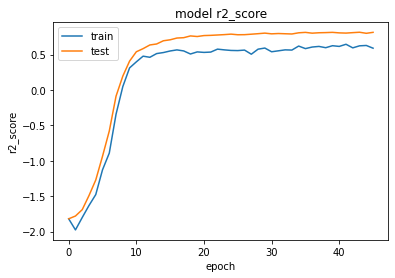

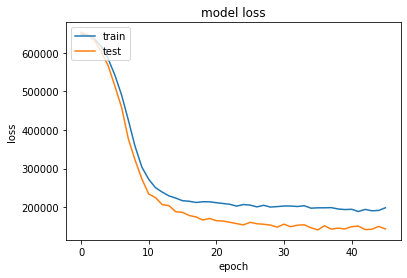

In [78]:
import matplotlib.pyplot as plt

plt.plot(history.history['r_2_score'])
plt.plot(history.history['val_r_2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [79]:
#initialise model
model_3 = Sequential()
#input layer
model_3.add(tf.keras.Input(shape=(13)))

#normaliztion layer
model_3.add(BatchNormalization())

#add new layer
model_3.add(Dense(256,activation=ReLU(), kernel_initializer=HeUniform(seed=7)))

# Dropout for regularization to prevent overefitting
model_3.add(Dropout(0.15))

model_3.add(Dense(128, activation=ReLU(),kernel_initializer=HeUniform(seed=7)))
model_3.add(Dropout(0.10))

model_3.add(Dense(64, activation=ReLU(),kernel_initializer=HeUniform(seed=7)))
model_3.add(Dropout(0.05))

model_3.add(Dense(32, activation=ReLU(),kernel_initializer=HeUniform(seed=7)))

#output layer
model_3.add(Dense(1,activation='linear'))


### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

In [80]:
model_3.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.002), metrics=[r_2_score])

### Train your model

- epochs: 1000
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



In [81]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, mode='min')
history = model_3.fit(X_train_sc, y_train,batch_size=64,
                    epochs=1000, verbose=1,
                    validation_data=(X_test_sc, y_test), callbacks=[callback,chkpt])

Epoch 1/1000
93/93 [==============================] - 2s 9ms/step - loss: 1008678600704.0000 - r_2_score: -0.7227 - val_loss: 709948276736.0000 - val_r_2_score: -0.0390
Epoch 2/1000
93/93 [==============================] - 1s 6ms/step - loss: 273733632000.0000 - r_2_score: 0.5545 - val_loss: 185711329280.0000 - val_r_2_score: 0.7069
Epoch 3/1000
93/93 [==============================] - 1s 7ms/step - loss: 185633357824.0000 - r_2_score: 0.6679 - val_loss: 159223382016.0000 - val_r_2_score: 0.7341
Epoch 4/1000
93/93 [==============================] - 1s 6ms/step - loss: 165844320256.0000 - r_2_score: 0.6780 - val_loss: 139045765120.0000 - val_r_2_score: 0.7932
Epoch 5/1000
93/93 [==============================] - 1s 6ms/step - loss: 149823782912.0000 - r_2_score: 0.6933 - val_loss: 128577527808.0000 - val_r_2_score: 0.8122
Epoch 6/1000
93/93 [==============================] - 1s 7ms/step - loss: 137768960000.0000 - r_2_score: 0.6969 - val_loss: 119451598848.0000 - val_r_2_score: 0.8264
E

### Check the R2 score on complete test data

In [82]:
model_2.evaluate(X_test_sc, y_test, batch_size=64)

31/31 [==============================] - 0s 4ms/step - loss: 141099.1250 - r_2_score: 0.8553


[141099.125, 0.8553183674812317]

In [83]:
y_pred = model_2.predict(X_test_sc)
print(r2_score(y_test,y_pred))

0.8410373563226169


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

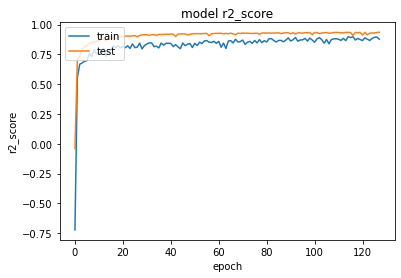

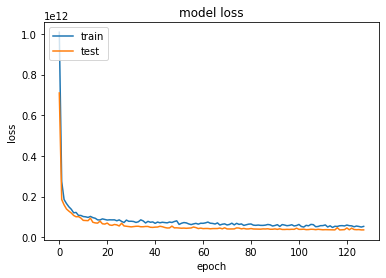

In [84]:
import matplotlib.pyplot as plt

plt.plot(history.history['r_2_score'])
plt.plot(history.history['val_r_2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
